## Things to check

#### * Which are the hottest geographies?
#### * Which are the hottest segments?
#### * Which are the hottest geographies-segement combinations?


In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('edtech_data.csv')
data.head()

,Title,Date,Trend,Country,Segment
0,Intel launches online learning platform in Africa,15-01-16,New Products,"Kenya,Nigeria,South Africa",Adult and Continuing Education
1,Tata TrUSts collaborates with MIT for new onli...,15-01-16,"Collaboration,New Products",India,"B2B Edtech Products for Schools,Platforms and LMS"
2,Syracuse University collaborates with 2U for o...,15-01-16,Collaboration,US,Online Higher Education
3,Apple acquires edtech company LearnSprout,15-01-16,Investments,US,Tools for Educators
4,Rovio Entertainment spins off its education di...,15-01-16,Expansion,Finland,"Educational Games,Pre K 12"


#### Breaking trends and selecting only investments

In [3]:
s = data['Trend'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Trend'
del data['Trend']
df = data.join(s)

In [4]:
df.head()

,Title,Date,Country,Segment,Trend
0,Intel launches online learning platform in Africa,15-01-16,"Kenya,Nigeria,South Africa",Adult and Continuing Education,New Products
1,Tata TrUSts collaborates with MIT for new onli...,15-01-16,India,"B2B Edtech Products for Schools,Platforms and LMS",Collaboration
1,Tata TrUSts collaborates with MIT for new onli...,15-01-16,India,"B2B Edtech Products for Schools,Platforms and LMS",New Products
2,Syracuse University collaborates with 2U for o...,15-01-16,US,Online Higher Education,Collaboration
3,Apple acquires edtech company LearnSprout,15-01-16,US,Tools for Educators,Investments


In [5]:
df1 = df[df['Trend'] == 'Investments']

## Countries with highest edtech investments

#### Slicing, counting and sorting countries column

In [6]:
df1.head()

,Title,Date,Country,Segment,Trend
3,Apple acquires edtech company LearnSprout,15-01-16,US,Tools for Educators,Investments
9,LearnLaunch Accelerator launches new program,15-01-16,US,Accelerators and Incubators,Investments
15,Flex Class raises financing,15-01-16,India,Adult and Continuing Education,Investments
16,Grovo raises Series C financing,15-01-16,US,Platforms and LMS,Investments
17,Myly raises seed financing,15-01-16,India,Mobile Apps,Investments


In [7]:
s = df1['Country'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Country'
del df1['Country']
df2 = df1.join(s)

In [8]:
df2.head()

,Title,Date,Segment,Trend,Country
3,Apple acquires edtech company LearnSprout,15-01-16,Tools for Educators,Investments,US
9,LearnLaunch Accelerator launches new program,15-01-16,Accelerators and Incubators,Investments,US
15,Flex Class raises financing,15-01-16,Adult and Continuing Education,Investments,India
16,Grovo raises Series C financing,15-01-16,Platforms and LMS,Investments,US
17,Myly raises seed financing,15-01-16,Mobile Apps,Investments,India


In [9]:
df1.shape

(139, 4)

In [10]:
df2.shape

(144, 5)

In [11]:
df3 = (pd.DataFrame(df2.groupby('Country').Title.nunique())).sort_values('Title', ascending=True )

In [12]:
df3

,Title
Country,
Finland,1
Germany,1
Ireland,1
Italy,1
Norway,1
South Korea,1
Spain,1
Vietnam,1
China,3


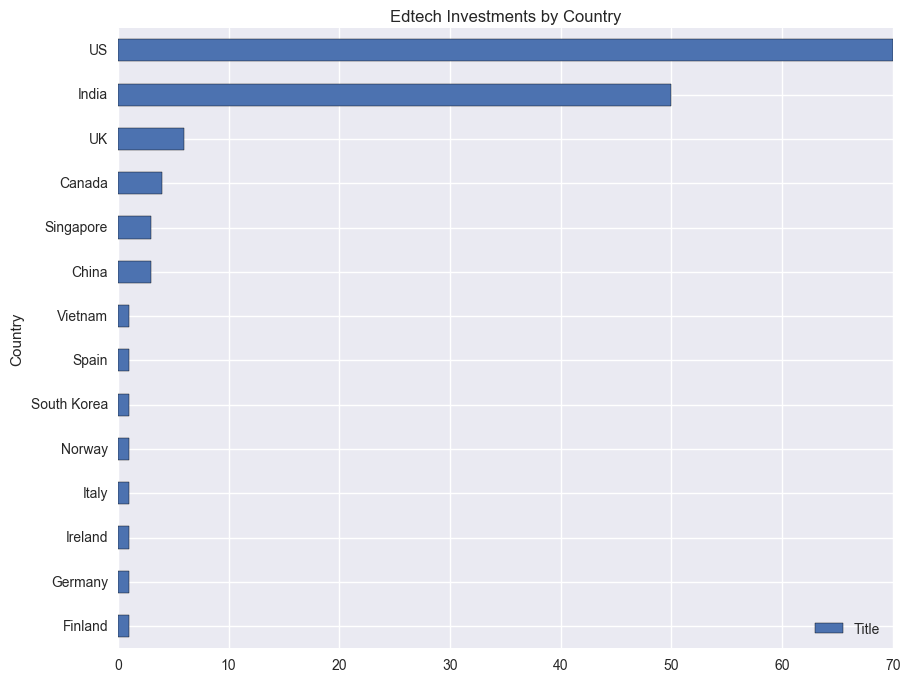

In [13]:
df3[['Title']].plot.barh(stacked=True, title = 'Edtech Investments by Country', figsize=(10, 8));

## Segments with highest edtech investments

#### Slicing, counting and sorting Segment column

In [14]:
df2.head()

,Title,Date,Segment,Trend,Country
3,Apple acquires edtech company LearnSprout,15-01-16,Tools for Educators,Investments,US
9,LearnLaunch Accelerator launches new program,15-01-16,Accelerators and Incubators,Investments,US
15,Flex Class raises financing,15-01-16,Adult and Continuing Education,Investments,India
16,Grovo raises Series C financing,15-01-16,Platforms and LMS,Investments,US
17,Myly raises seed financing,15-01-16,Mobile Apps,Investments,India


In [15]:
df2.shape

(144, 5)

In [16]:
s = df2['Segment'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Segment'
del df2['Segment']
df4 = df2.join(s)

In [17]:
df4.head()

,Title,Date,Trend,Country,Segment
3,Apple acquires edtech company LearnSprout,15-01-16,Investments,US,Tools for Educators
9,LearnLaunch Accelerator launches new program,15-01-16,Investments,US,Accelerators and Incubators
15,Flex Class raises financing,15-01-16,Investments,India,Adult and Continuing Education
16,Grovo raises Series C financing,15-01-16,Investments,US,Platforms and LMS
17,Myly raises seed financing,15-01-16,Investments,India,Mobile Apps


In [18]:
df4.shape

(190, 5)

In [19]:
df5 = (pd.DataFrame(df4.groupby('Segment').Title.nunique())).sort_values('Title', ascending=True )

In [20]:
df5

,Title
Segment,
Saas Products,1
Pre K 12,1
Content Publishers,2
Edtech Hardware,2
Community and Crowd Sourcing Products,3
Online Vocational and Hobby Courses,3
Online Higher Education,3
Online Courses for Schools,3
Language Learning,6


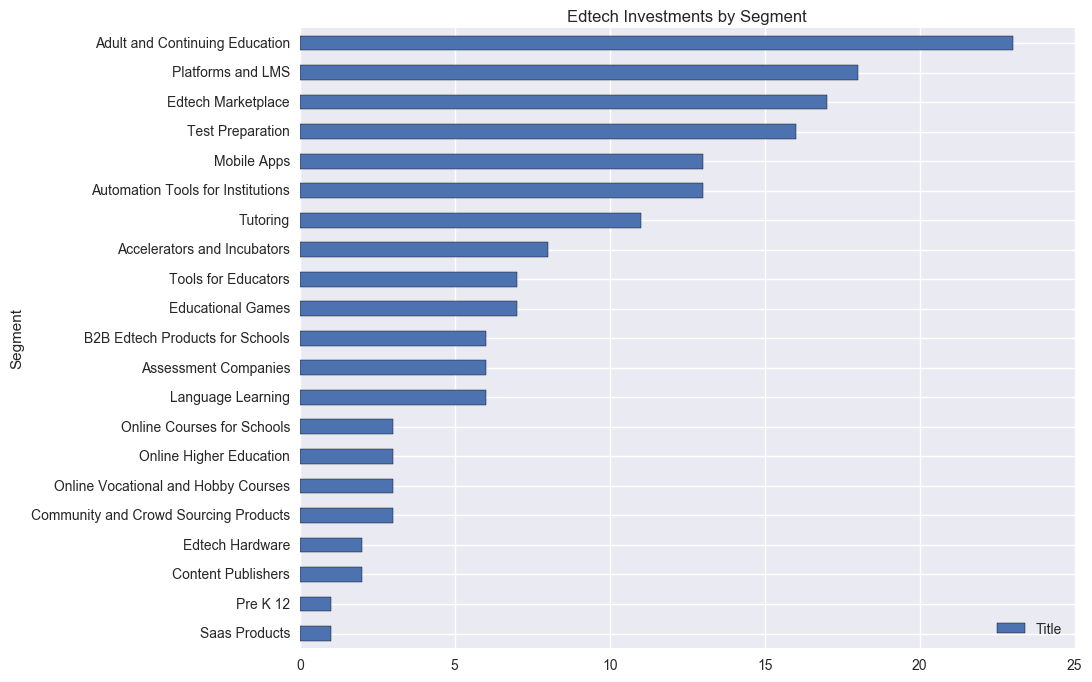

In [21]:
df5[['Title']].plot.barh(stacked=True, title = 'Edtech Investments by Segment', figsize=(10, 8));

## Highest geographies-segement combinations

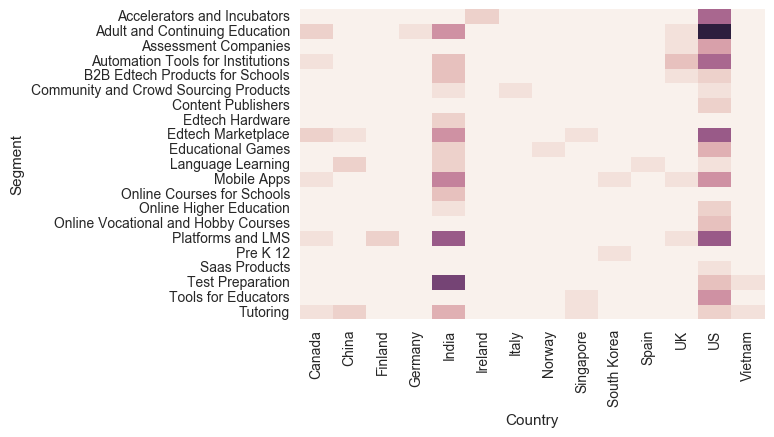

In [31]:
dd = df4[['Country','Segment','Title']]
gg = dd.groupby(['Country','Segment'],as_index=False).count().rename(columns={"Title":"Number"})
gp = gg.pivot(columns="Country",index="Segment",values="Number").fillna(0)
sns.heatmap(gp,cbar=False)


In [32]:
gp

Country,Canada,China,Finland,Germany,India,Ireland,Italy,Norway,Singapore,South Korea,Spain,UK,US,Vietnam
Segment,,,,,,,,,,,,,,
Accelerators and Incubators,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
Adult and Continuing Education,2.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0
Assessment Companies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0
Automation Tools for Institutions,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,0.0
B2B Edtech Products for Schools,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
Community and Crowd Sourcing Products,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Content Publishers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
Edtech Hardware,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Edtech Marketplace,2.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0


#### - Abhishek Chhibber